In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
from six.moves import urllib
import zipfile
from scipy import stats

In [5]:
urllib.request.urlretrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip","file.zip")

('file.zip', <http.client.HTTPMessage at 0x7f462ca038d0>)

In [7]:
zipfile.ZipFile("file.zip").extractall()

In [9]:
df = pd.read_csv("dow_jones_index.data")
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [10]:
def omit_s(x):
    return x[1:]
df['high'] = df['high'].apply(omit_s)
df['low'] = df['low'].apply(omit_s)
df['open'] = df['open'].apply(omit_s)
df['close'] = df['close'].apply(omit_s)

In [11]:
df.shape

(750, 16)

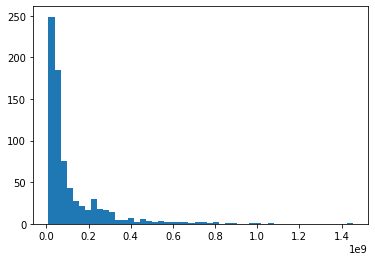

In [12]:
plt.hist(df['volume'], bins=50)
plt.show()

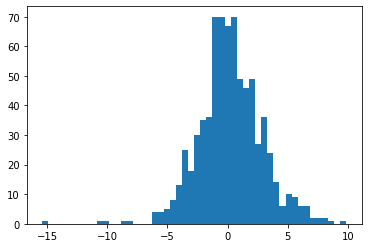

In [13]:
plt.hist(df['percent_change_next_weeks_price'], bins=50)
plt.show()

In [14]:
dist = getattr(stats, 'norm')
parameters = dist.fit(df['percent_change_next_weeks_price'])
print(parameters)

(0.23846810386666667, 2.67775139226584)


In [16]:
stats.kstest(df['percent_change_next_weeks_price'], "norm", parameters)

KstestResult(statistic=0.04591966870880479, pvalue=0.08200697746851143)

In [18]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
#%%capture --no-stdout
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df['volume'])
    a = stats.kstest(df['volume'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

halfcauchy: statistic=0.03887087256332211, pvalue=0.20204162876406467
invgauss: statistic=0.03948353997389775, pvalue=0.1879224115526973
johnsonsu: statistic=0.04418543762126281, pvalue=0.10380347365141483
invweibull: statistic=0.050243977925688355, pvalue=0.043802697425837145
mielke: statistic=nan, pvalue=nan
powerlognorm: statistic=0.045194544377339274, pvalue=0.09060002394121489
nct: statistic=0.04523016932936125, pvalue=0.0901608825318237
exponweib: statistic=0.04706600897371804, pvalue=0.0698285112856048
burr: statistic=0.050123926165586474, pvalue=0.044605828385026754
lognorm: statistic=0.05103977355535111, pvalue=0.03878989313781864
betaprime: statistic=0.05322033344188226, pvalue=0.02753265466120649
invgamma: statistic=0.05332900790496364, pvalue=0.02705615502641978
johnsonsb: statistic=0.05709637394745409, pvalue=0.014450279543746808
f: statistic=0.05720236505041787, pvalue=0.014188756739448355
alpha: statistic=0.05924967503868539, pvalue=0.009904869644000119
gengamma: statist